# <center> Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''select
            count(*) as number_count
            from vacancies
'''

In [5]:
# результат запроса
number_count = pd.read_sql_query(query_3_1, connection)
number_count

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,number_count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''select
            count(*) as number_count_employers
            from employers
'''

In [7]:
# результат запроса
number_count_employers = pd.read_sql_query(query_3_2, connection)
number_count_employers

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,number_count_employers
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''select
            count(*) as number_count_areas
            from areas
'''

In [9]:
# результат запроса
number_count_areas = pd.read_sql_query(query_3_3, connection)
number_count_areas

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,number_count_areas
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
# текст запроса
query_3_4 = f'''select
            count(*) as number_count_industries
            from industries 
'''

In [11]:
# результат запроса
number_count_industries = pd.read_sql_query(query_3_4, connection)
number_count_industries

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,number_count_industries
0,294


***

**Выводы по предварительному анализу данных**
- В нашей базе содержиться следующее: 
1. Почти 50 тыс. вакансий.
2. Более 20 тыс. работодателей.
3. Работу предлагают в 1362 городах.
4. Предлагают почти 300 сфер деятельности.

# Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1 = f'''select
            a.name as area,
            count(*) as cnt
            from areas as a
            join vacancies v on a.id=v.area_id
            group by a.name
            order by cnt desc
            limit 10
'''

In [13]:
# результат запроса
vacancies_count = pd.read_sql_query(query_4_1, connection)
vacancies_count

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query_4_2 = f'''select
            count(*) as cnt
            from vacancies as v
            where salary_from is not null or salary_to is not null
'''

In [15]:
# результат запроса
salary_count = pd.read_sql_query(query_4_2, connection)
salary_count

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3 = f'''select
            avg(salary_from) as avg_salary_from,
            avg(salary_to) as avg_salary_to
            from vacancies as v
'''

In [17]:
# результат запроса
avg_salary_count = pd.read_sql_query(query_4_3, connection)
round(avg_salary_count)

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4 = f'''select
            count(*) as cnt,
            schedule,
            employment
            from vacancies as v
            group by schedule, employment
            order by cnt desc
'''

In [19]:
# результат запроса
schedule_count = pd.read_sql_query(query_4_4, connection)
schedule_count

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
query_4_5 = f'''select
            count(*) as cnt,
            experience
            from vacancies as v
            group by experience
            order by cnt
'''

In [21]:
# результат запроса
experience_count = pd.read_sql_query(query_4_5, connection)
experience_count

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

**Выводы по детальному анализу вакансий**
- Чем больше город, тем больше предложений
- Средняя заработная плата составляет 71 тыс. - 110 тыс. рублей.
- Предложений больше у тех, у кого меньше 6 лет опыта работы.
- Предложений больше с графиков полный день - полная занятость.

# Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [22]:
# текст запроса
query_5_1 = f'''
            select 
                e.name,  
                count(v.id) 
            from public.vacancies v
                join public.employers e on v.employer_id=e.id
            group by 1
            order by 2 desc
            limit 10
            '''

In [23]:
# результат запроса
name_count_5 = pd.read_sql_query(query_5_1, connection)
name_count_5

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
5,ИК СИБИНТЕК,327
6,МТС,292
7,DataArt,247
8,Совкомбанк Технологии,204
9,Первый Бит,176


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [24]:
# текст запроса
query_5_2 = f'''
            select 
                a.name,  
                count(distinct e.id) as emp_cnt,
                count(distinct v.id) as vcn_cnt
            from public.areas a
                left join public.employers e on e.area=a.id
                left join public.vacancies v on v.area_id=a.id
            where v.id is null
            group by 1
            order by emp_cnt desc
            limit 10
            '''

In [25]:
# результат запроса
emp_cnt = pd.read_sql_query(query_5_2, connection)
emp_cnt

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,emp_cnt,vcn_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
5,Ростовская область,18,0
6,Азербайджан,17,0
7,Нижегородская область,16,0
8,Республика Татарстан,16,0
9,Узбекистан,15,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [26]:
# текст запроса
query_5_3 = f'''
    SELECT
        e.name 
        ,count(distinct v.area_id) as areas_count
    FROM public.employers as e
    LEFT JOIN public.vacancies as v on v.employer_id = e.id
    GROUP by e.name
    ORDER by areas_count desc
    limit 10
    ;
  '''

In [27]:
# результат запроса
areas_count = pd.read_sql_query(query_5_3, connection)
areas_count

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,areas_count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [28]:
# текст запроса
query_5_4 = f'''
    SELECT
        count(e.id) as cnt 
    FROM public.employers as e
    LEFT JOIN public.employers_industries as ei on ei.employer_id = e.id
    where ei.employer_id is null
    limit 10
    ;
  '''

In [29]:
# результат запроса
employers_industries = pd.read_sql_query(query_5_4, connection)
employers_industries

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [30]:
# текст запроса
query_5_5 = f'''
    SELECT
    e.name,
    count(distinct ei.industry_id) as cnt
    FROM public.employers as e
    LEFT JOIN public.employers_industries as ei on ei.employer_id = e.id
    WHERE ei.employer_id is not null
    GROUP by e.name
    HAVING count(distinct ei.industry_id) = 4
    ORDER by e.name asc
    LIMIT 1
    OFFSET 2
    ;
  '''

In [31]:
# результат запроса
employers_industries_1 = pd.read_sql_query(query_5_5, connection)
employers_industries_1

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [32]:
# текст запроса
query_5_6 = f'''
    SELECT
    count(distinct e.id) as cnt
    FROM public.employers_industries as ei
    join employers as e on ei.employer_id=e.id
    join industries as i on ei.industry_id = i.id
    where i.name = 'Разработка программного обеспечения'
    ;
  '''

In [33]:
# результат запроса
employers_industries_2 = pd.read_sql_query(query_5_6, connection)
employers_industries_2

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [41]:
# код для получения списка городов-милионников
web = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
data = list(pd.read_html(web)[1]['Город'])
data[13] = data[13][:-3]
data

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [49]:
# текст запроса
query_5_7 = f'''
            (
             select
                a.name city,
                count(v.id) vacancies
            from public.vacancies v 
                join public.employers e on v.employer_id = e.id
                    join public.areas a on v.area_id = a.id
            where a.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород',
           'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
            and
            e.name = 'Яндекс'
            group by 1
)

union all   

(
select
         'Total',
         count(v.id)
from
         public.vacancies v 
    join public.employers e on v.employer_id = e.id
        join public.areas a on v.area_id = a.id
        
where a.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород',
           'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
         and
         e.name = 'Яндекс'
group by 1         
)

order by 2 

            '''

In [50]:
cities = pd.read_sql_query(query_5_7, connection)
cities

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,city,vacancies
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

**Выводы по анализу работодателей**
- В сфере "Разработки программного обеспечения" работает 3553 компаний.
- Лидеры по количеству вакансий Яндекс, Ростелеком, Тинькофф, Сбер, Газпром.
- Также Яндекс является лидером по размещений вакансий в разных городах.

# Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [52]:
# текст запроса
query_6_1 = f'''
            select
                count(v.id) ds_vacancies
            from public.vacancies v
where (lower(v.name) like '%data%' 
        or lower(v.name) like '%данн%')
            '''

In [53]:
# результат запроса
ds_vacancies = pd.read_sql_query(query_6_1, connection)
ds_vacancies

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ds_vacancies
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [62]:
# текст запроса
query_6_2 = f'''
            select 
                count(id) junior_vacancies
            from public.vacancies 
where (lower(name) like '%data scientist%' or 
        lower(name) like '%data science%' or
            lower(name) like '%исследователь данных%' or
                ((name) like '%ML%' and (name) not like '%HTML%') or
                    lower(name) like '%machine learning%' or
                        lower(name) like '%машинн%обучен%')  
                            
            and
            (lower(name) like '%junior%' or
                lower(experience) like '%нет опыта%' or
                    lower(employment) like '%стажировка%')
            '''

In [64]:
# результат запроса
jun_vacancies = pd.read_sql_query(query_6_2, connection)
jun_vacancies

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,junior_vacancies
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [66]:
# текст запроса
query_6_3 = f'''
            select 
                count(id) sql_skills
            from public.vacancies 
where (lower(name) like '%data scientist%' or 
        lower(name) like '%data science%' or
            lower(name) like '%исследователь данных%' or
                (name like '%ML%' and name not like '%HTML%') or
                    lower(name) like '%machine learning%' or
                        lower(name) like '%машинн%обучен%') 
            and
            (lower(key_skills) like '%sql%' or 
                lower(key_skills) like '%postgres%')
            '''

In [67]:
# результат запроса
sql_vacancies = pd.read_sql_query(query_6_3, connection)
sql_vacancies

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,sql_skills
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [68]:
# текст запроса
query_6_4 = f'''
            select 
                count(id) python_skills
            from public.vacancies 
where (lower(name) like '%data scientist%' or 
        lower(name) like '%data science%' or
            lower(name) like '%исследователь данных%' or
                (name like '%ML%' and name not like '%HTML%') or
                    lower(name) like '%machine learning%' or
                        lower(name) like '%машинн%обучен%') 
            and (lower(key_skills) like '%python%')
            '''

In [69]:
# результат запроса
python_skills = pd.read_sql_query(query_6_4, connection)
python_skills

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,python_skills
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [70]:
# текст запроса
query_6_5 = f'''
            select
                ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), ''))+1), 2) avg_ds_skills
            from public.vacancies 
where (lower(name) LIKE '%data scientist%' OR 
    lower(name) LIKE '%data science%' OR
        lower(name) LIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
                lower(name) LIKE '%machine learning%' OR
                    lower(name) LIKE '%машинн%обучен%')
	        and (key_skills IS NOT NULL)
           '''

In [71]:
# результат запроса
avg_ds_skills = pd.read_sql_query(query_6_5, connection)
avg_ds_skills

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,avg_ds_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [72]:
# текст запроса
query_6_6 = f'''
          select
            experience,
            ROUND(AVG(COALESCE((salary_to + salary_from)/2, salary_from, salary_to))) avg_salary
          from public.vacancies 
          where (lower(name) LIKE '%data scientist%' OR 
                lower(name) LIKE '%data science%' OR
                    lower(name) LIKE '%исследователь данных%' OR
                        (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
                           lower(name) LIKE '%machine learning%' OR
                                lower(name) LIKE '%машинн%обучен%')
               
          AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
          AND (experience IS NOT NULL)
          GROUP BY 1
           '''

In [73]:
# результат запроса
avg_salary = pd.read_sql_query(query_6_6, connection)
avg_salary

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

**Выводы по предметному анализу**
- Примерно 10% вакансий относятся к джунам DS.
- Самые востребованные навыки это Python, SQL, Postgre.
- Средняя заработная плата специалистов без опыта составляет 75 тыс. рублей.

# Общий вывод по проекту

По результатам исследования можно сказать что HH работает не только по России, но и в других страннах.
Лидеры вакансий являются крупные города как Москва, Санк-Петербург.
Самыми востребованными специалистами работающие в режиме "Полная занятость" по графику "Полный день и Удаленная работа".

Зарплатная вилка составляет от 71 тыс. - 110 тыс. рублей.
Работодателями, предлагающими большую часть вакансий являются крупнейшие российские корпорации: "Яндекс", "Ростелеком", "Тинькофф", "СБЕР", "Газпром нефть".

К профессии Data Science приходится 3.6% вакансий от общего числа. Требования довольно жесткие, должен обладать более 5 профессиональными навыками для работы с данными.

Вообщем и целом, можно сказать что данный анализ является поверхностным. Но согласно международным отчетам по будующим профессиям на ближайщие 10 лет, самыми востребованными являются: Data Science, Специалисты по анализу данных, ML, AI. Таким образом, данная область востребована на многие годы.

#### Дополнительный анализ данных

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


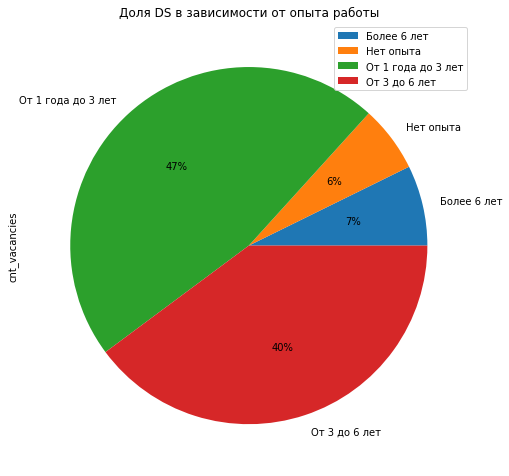

In [76]:
# Посмотроим диаграмму Data Science по опыту работы.
query_7_1 = f'''select 
        experience,
        count(id) cnt_vacancies
from public.vacancies
where (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%')
      )
group by experience
'''
data_exp = pd.read_sql_query(query_7_1, connection)
data_exp.groupby(['experience']).sum().plot(
    kind='pie',
    y = 'cnt_vacancies',
    autopct='%1.0f%%',
    title='Доля DS в зависимости от опыта работы',
    figsize=(8, 10),
);


Сразу визуально понятно с каким опытом востребованы на рынке. Нет времени объяснять, пойду составлять резюме.

In [78]:
connection.close()